# User manual
The following codes explain the minimal steps to run backtest.

### Import required modules

In [3]:
from backtest_engine import BacktestEngine
from target_generator import TargetGenerator

### Initialize the backtest engine
Your own API key for FRED is needed. It can be issued in https://fred.stlouisfed.org/ for free.  

In [5]:
engine = BacktestEngine(API_key="ad0b46ed99911d1f77534d035a2cdb72")

[__init__] is executed in 32.08 seconds


### Make customized target generator 
The target generator should inherit TargetGenerator as its super-class. 
The class below gives the equal-weighted portfolio for given universet of ETFs.

In [6]:
class EqualWeightGenerator(TargetGenerator):
    def __init__(self, cache):
        super().__init__(cache)

    def compute_target(self, universe_list):
        target_weight = {}
        for ticker in universe_list:
            target_weight[ticker] = 1
            
        target_weight = self.normalize(target_weight)

        return target_weight

### Initialize the target generator class
The taget generator class needs the cache data of the backtest engine class.

In [7]:
mtg = EqualWeightGenerator(engine.cache)

### Define universe
You may define the customized universe of ETFs for the backtest. If you do not specify the universe, the backtest engine will automatically set the universe as a set of listed ETFs at a given date.

In [8]:
custom_universe = ['XLY', 'XLP', 'XLE' ,'XLF', 'XLV', 'XLI', 'XLB', 'XLK', 'XLU']

### Run backtest
Now you can run backtest. You should specify target_generator, sdate, and edate. The sdate and edate should be given as 'YYYY-MM-DD' format.

In [9]:
engine.run_backtest(target_generator=mtg, sdate='2010-01-01', edate='2021-01-01', custom_universe = custom_universe)

Backtest period: 2010-01-04 00:00:00 -- 2020-12-31 00:00:00
=== date:2020-12-31 00:00:00 / total_asset:3.561 / time elapsed:3.7 ===
[run_backtest] is executed in 3.82 seconds


### Show results
You can view your asset allocation in engine.asset_df dataframe. Further visualization functions are in development

<AxesSubplot:>

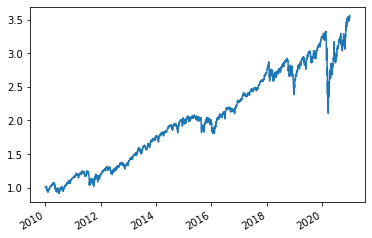

In [10]:
engine.asset_df.sum(axis=1).plot()